# Importing the libraries

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot

In [3]:
from sklearn.model_selection import KFold

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
from sklearn.svm import SVC

# Loading the dataset

### By using pandas, we can load the dataset.

In [11]:
def load_data(file):
    col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi','age', 'class']
    dataframe = pd.read_csv(file, names = col_names)
    return dataframe

In [12]:
filename = 'pima-indians-diabetes.csv'

In [13]:
df = load_data(filename)

In [14]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Understand the Data with Descriptive Statistics

### Basic operations over the data.

- Access top 10 rows of the data.

In [15]:
def top_10_rows(dframe):
    print(dframe.head(10))

In [16]:
top_10_rows(df)

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


- Total number of rows and columns by calling shape attribute.

In [17]:
def df_rows_columns(dframe):
    print(dframe.shape)

In [18]:
df_rows_columns(df)

(768, 9)


- Type of each attribute by calling dtypes attribute.

In [19]:
def df_columns_dtypes(dframe):
    print(dframe.dtypes)

In [20]:
df_columns_dtypes(df)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


- Summarize  data using descriptive statistics

In [21]:
def df_summary(dframe):
    description = dframe.describe()
    print(description)

In [22]:
df_summary(df)

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

- Distribution of the class.

In [23]:
def classes_count(dframe):
    each_class_count = dframe.groupby('class').size()
    print(each_class_count)

In [24]:
classes_count(df)

class
0    500
1    268
dtype: int64


- Correlations Between Attributes

In [25]:
def correlation(dframe):
    correlations = dframe.corr(method = 'pearson')
    print(correlations)

In [26]:
correlation(df)

           preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.263514  0.466581  
pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.0335

- Skew of Univariate Distributions

In [27]:
def df_skew(dframe):
    sq = dframe.skew()
    print(sq)

In [28]:
df_skew(df)

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64


# Understand Data with Visualization

- Histograms

In [29]:
def df_histogram(dframe):
    dframe.hist()
    pyplot.show()

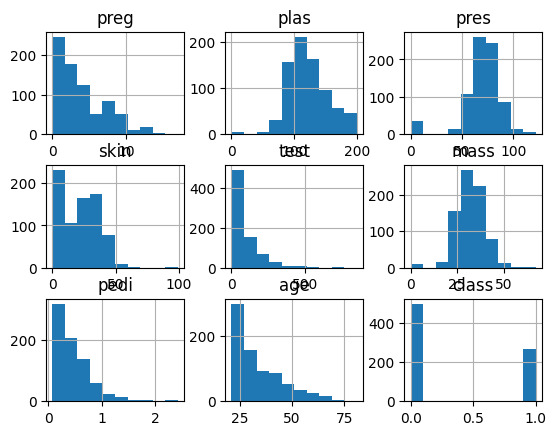

In [30]:
df_histogram(df)

- Density plots

In [31]:
def df_density_plt(dframe):
    dframe.plot(kind = 'density',
                subplots = True,
                layout = (3,3),
                sharex = False)
    pyplot.show()

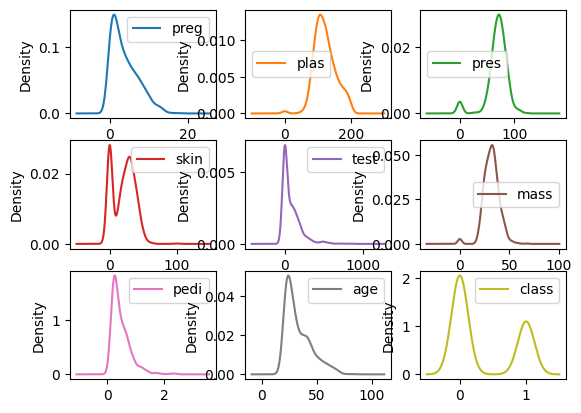

In [32]:
df_density_plt(df)

- Box and Whisker Plots

In [33]:
def df_boc_plt(dframe):
    dframe.plot(kind = 'box',
            subplots = True,
            layout = (3,3),
            sharex = False,
            sharey = False)
    pyplot.show()    

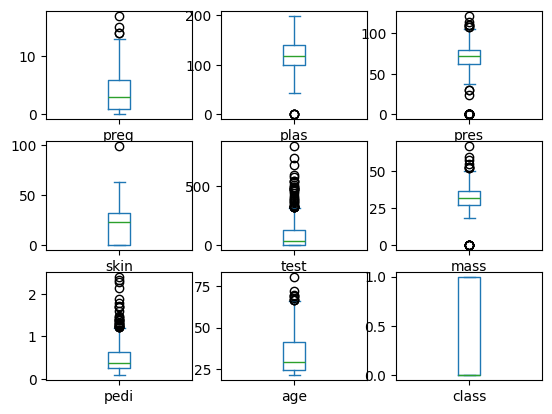

In [34]:
df_boc_plt(df)

- Correlation Matrix Plot

In [35]:
import numpy

In [36]:
def corr_matrix(dframe):
    correlations = df.corr()
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = numpy.arange(0,9,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age','class']
    ax.set_xticklabels(col_names)
    ax.set_yticklabels(col_names)
    pyplot.show()

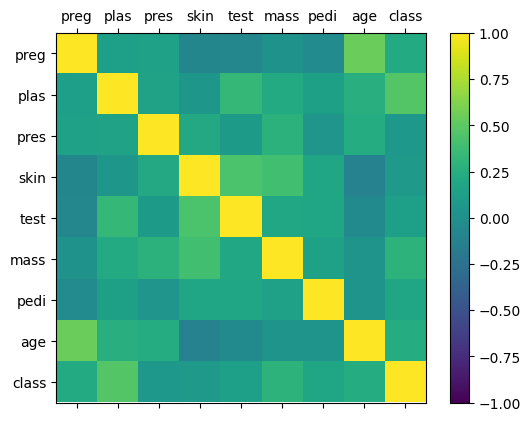

In [37]:
corr_matrix(df)

- Scatter Plot Matrix

In [38]:
from pandas.plotting import scatter_matrix

In [39]:
def scat_matrix(dframe):
    scatter_matrix(df)
    pyplot.show()

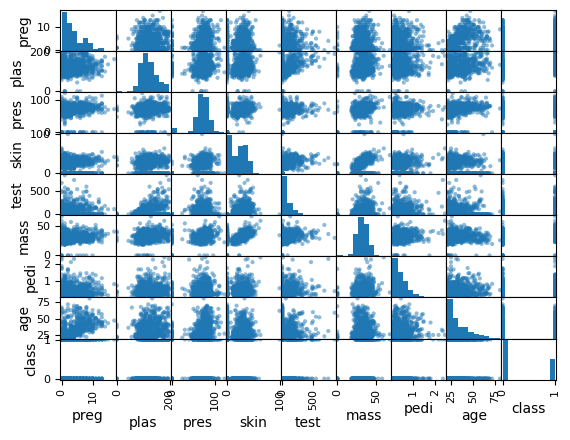

In [40]:
scat_matrix(df)

# Data Pre-processing

- Rescale Data

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
from numpy import set_printoptions

In [43]:
def rescale_data(array):
    X = array[:, 0:8]
    y = array[:, 8]
    scaler = MinMaxScaler(feature_range = (0, 1))
    rescaledX = scaler.fit_transform(X)
    set_printoptions(precision = 3)
    print(rescaledX[0:5, :])

In [44]:
arr = df.values

In [45]:
rescale_data(arr)

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


- Standardize Data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
def standardize_data(array):
    X = array[:,0:8]
    y = array[:,8]
    scaler = StandardScaler().fit(X)
    rescaledX = scaler.transform(X)
    set_printoptions(precision=3)
    print(rescaledX[0:5 , :])

In [48]:
standardize_data(arr)

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


- Normalize Data

In [49]:
from sklearn.preprocessing import Normalizer

In [50]:
def normalize_data(array):
    X = array[:,0:8]
    y = array[:,8]
    scaler = Normalizer().fit(X)
    rescaledX = scaler.transform(X)
    set_printoptions(precision = 3)
    print(rescaledX[0:5,:])

In [51]:
normalize_data(arr)

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


# Feature Selection for Machine Learning

- Univariate Selection

In [52]:
from sklearn.feature_selection import SelectKBest

In [53]:
from sklearn.feature_selection import chi2

In [54]:
def select_best_features(array):
    X = array[:,0:8]
    y = array[:,8]
    test = SelectKBest(score_func = chi2, k = 4)
    fit = test.fit(X, y)
    set_printoptions(precision = 3)
    print(fit.scores_)
    features = fit.transform(X)
    print(features[0:5,:])

In [55]:
select_best_features(arr)

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


- Feature Importance

In [56]:
from sklearn.ensemble import ExtraTreesClassifier

In [57]:
def feature_importance(array):
    X = array[:, 0:8]
    y = array[:, 8]
    model = ExtraTreesClassifier()
    model.fit(X, y)
    print(model.feature_importances_)

In [58]:
feature_importance(arr)

[0.106 0.243 0.098 0.078 0.076 0.139 0.122 0.139]


# Evaluate the Performance of Machine Learning Algorithms

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
def splitting_data(array):
    X = array[:, 0:8]
    y = array[:, 8]
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33)
    return X_train, X_test, y_train, y_test

In [61]:
X_train, X_test, y_train, y_test = splitting_data(arr)

In [62]:
def model_train(X_train, X_test, y_train, y_test):
    model = LogisticRegression(solver = 'lbfgs', max_iter = 3000)
    model.fit(X_train, y_train)
    result = model.score(X_test, y_test)
    print("Accuracy:", result*100.0)

In [63]:
model_train(X_train, X_test, y_train, y_test)

Accuracy: 75.98425196850394


- K fold cross validation

In [64]:
def k_fold_cross(array):
    X = array[:, 0:8]
    y = array[:, 8]
    kfold = KFold(n_splits = 10)
    model = LogisticRegression(solver = 'lbfgs', max_iter = 3000)
    results = cross_val_score(model, X, y, cv = kfold)
    print("Accuracy:", results.mean()*100.0)

In [65]:
k_fold_cross(arr)

Accuracy: 77.60423786739577


In [66]:
def classification_acc(array):
    X = array[:, 0:8]
    y = array[:, 8]
    kfold = KFold(n_splits = 10)
    model = LogisticRegression(solver = 'lbfgs', max_iter = 3000)
    results = cross_val_score(model, X, y, cv = kfold, scoring ='accuracy')
    print("Accuracy: ", results.mean()*100)

In [67]:
classification_acc(arr)

Accuracy:  77.60423786739577


- Area Under ROC Curve

In [68]:
def area_under_roc(array):
    X = array[:, 0:8]
    y = array[:, 8]
    kfold = KFold(n_splits = 10)
    model = LogisticRegression(solver = 'lbfgs', max_iter = 3000)
    results = cross_val_score(model, X, y, cv = kfold, scoring ='roc_auc')
    print("Accuracy: ", results.mean()*100)

In [69]:
area_under_roc(arr)

Accuracy:  82.80277116334987


- Classification Report

In [70]:
from sklearn.metrics import classification_report

In [71]:
def classifi_report(X_train, X_test, y_train, y_test):
    model = LogisticRegression(solver = 'lbfgs', max_iter = 3000)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    report = classification_report(y_test, predicted)
    print(report)

In [72]:
classifi_report(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       169
         1.0       0.67      0.56      0.61        85

    accuracy                           0.76       254
   macro avg       0.73      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



- Choosing the best algorithm

In [73]:
def all_models():
    models = []
    models.append(('LR', LogisticRegression(solver = 'lbfgs',max_iter = 3000)))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    return models

In [74]:
def train_models_scores(algorithms, X, y):
    results = []
    names = []
    for name, algorithm in algorithms:
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(algorithm, X, y, cv =
        kfold, scoring = 'accuracy')
        results.append(cv_results)
        names.append(name)
        msg = (name, cv_results.mean(),cv_results.std())
        print(msg)
    fig = pyplot.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    pyplot.boxplot(results)
    ax.set_xticklabels(names)
    pyplot.show()

In [75]:
X = arr[:, 0:8]

In [76]:
y = arr[:, 8]

In [77]:
ml_models = all_models()

('LR', 0.7760423786739576, 0.051575452620868226)
('LDA', 0.773462064251538, 0.05159180390446138)
('KNN', 0.7265550239234451, 0.06182131406705549)
('CART', 0.7016917293233083, 0.05867612754452136)
('NB', 0.7551777170198223, 0.04276593954064409)
('SVM', 0.7604237867395763, 0.05293077027238117)


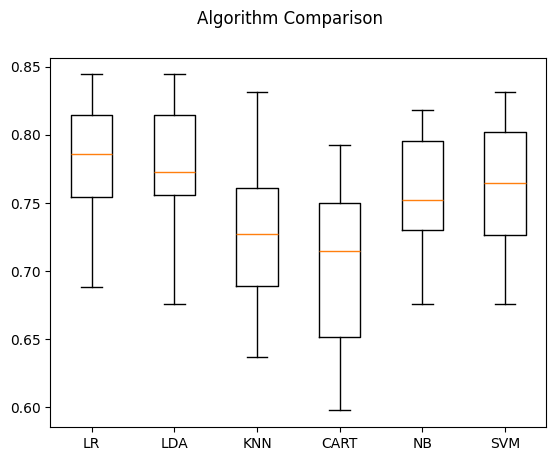

In [78]:
train_models_scores(ml_models, X, y)